### TSLA  & Elon Musk Sentiment


- - -

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime
from datetime import timedelta

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Read Data from CSV files
tsla_tweet = pd.read_csv("supportfiles/tslatweets.csv")
elonmusk_tweet = pd.read_csv("supportfiles/ElonMusktweets.csv")
tsla_stock = pd.read_csv("supportfiles/TSLA_stock.csv")

In [3]:
#Convert Date column to Pandas Date Time format
tsla_tweet["Date"] = pd.to_datetime(tsla_tweet["Date"])
elonmusk_tweet["Date"] = pd.to_datetime(elonmusk_tweet["Date"])
tsla_stock["Date"] = pd.to_datetime(tsla_stock["Date"])

In [4]:
tsla_tweet.head()

,Count,Compound,Date,Neutral,Negative,Positive,Tweet,User
0,0,0.0000,2018-06-15 03:28:15,1.000,0.000,0.000,Check out the companies producing headlines be...,easier2live
1,1,-0.6486,2018-06-15 03:28:07,0.538,0.462,0.000,$TSLA shorts are literally dead. https://t.co/...,BankofVol
2,2,0.3818,2018-06-15 03:26:31,0.698,0.000,0.302,RT @TeslaCharts: Growth synergies bro.\r\n$TSL...,librab103
3,3,0.2263,2018-06-15 03:25:38,0.667,0.133,0.200,RT @MelaynaLokosky: Fraud is not a sustainable...,engineerhunter
4,4,0.0000,2018-06-15 03:23:50,1.000,0.000,0.000,RT @blainefundlp: Obviously Bullish $TSLA htt...,Marcelozinn


In [5]:
elonmusk_tweet.head()

,Count,Compound,Date,Neutral,Negative,Positive,Tweet,User
0,0,-0.3182,2018-06-15 03:55:39,0.905,0.095,0.000,RT @tictoc: .@elonmusk says the Boring Co.’s h...,LewisFranck
1,1,-0.4019,2018-06-15 03:55:21,0.769,0.231,0.000,@tictoc @elonmusk Anything the deflect from th...,IanA_Aus
2,2,0.6697,2018-06-15 03:55:06,0.814,0.000,0.186,@tictoc @elonmusk He is quite clearly on some ...,__R_Adair__
3,3,-0.3182,2018-06-15 03:54:44,0.905,0.095,0.000,RT @tictoc: .@elonmusk says the Boring Co.’s h...,shauntheyawn
4,4,0.0000,2018-06-15 03:54:28,1.000,0.000,0.000,RT @MonsNoobis: @seekevinrun @elonmusk @boring...,paizurizilla


In [6]:
tsla_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PS Ratio
0,2018-06-13,346.709991,347.200012,339.799988,344.779999,344.779999,9469800,4.858
1,2018-06-14,347.630005,358.750000,346.600006,357.720001,357.720001,10981000,4.898
2,2018-06-15,353.839996,364.670013,351.250000,358.170013,358.170013,10531700,4.899
3,2018-06-18,355.400000,373.730000,354.500000,370.830000,370.830000,11693075,5.030
4,2018-06-19,365.160000,370.000000,346.250000,352.550000,352.550000,12537147,5.125


In [7]:
# add new date column - converted "DATE" to PST
tsla_tweet["datetime_pst"] = tsla_tweet['Date'].map(lambda x: x-timedelta(hours = 8))
#tsla_tweet
elonmusk_tweet["datetime_pst"] = elonmusk_tweet['Date'].map(lambda x: x-timedelta(hours = 8))
#elonmusk_tweet


In [8]:
# add new date only column based on new column above datetime_pst
tsla_tweet["date_only"] = tsla_tweet['datetime_pst'].map(lambda x: datetime.date(x))
tsla_tweet.head()

,Count,Compound,Date,Neutral,Negative,Positive,Tweet,User,datetime_pst,date_only
0,0,0.0000,2018-06-15 03:28:15,1.000,0.000,0.000,Check out the companies producing headlines be...,easier2live,2018-06-14 19:28:15,2018-06-14
1,1,-0.6486,2018-06-15 03:28:07,0.538,0.462,0.000,$TSLA shorts are literally dead. https://t.co/...,BankofVol,2018-06-14 19:28:07,2018-06-14
2,2,0.3818,2018-06-15 03:26:31,0.698,0.000,0.302,RT @TeslaCharts: Growth synergies bro.\r\n$TSL...,librab103,2018-06-14 19:26:31,2018-06-14
3,3,0.2263,2018-06-15 03:25:38,0.667,0.133,0.200,RT @MelaynaLokosky: Fraud is not a sustainable...,engineerhunter,2018-06-14 19:25:38,2018-06-14
4,4,0.0000,2018-06-15 03:23:50,1.000,0.000,0.000,RT @blainefundlp: Obviously Bullish $TSLA htt...,Marcelozinn,2018-06-14 19:23:50,2018-06-14


In [9]:
# add new date only column based on new column above datetime_pst
elonmusk_tweet["date_only"] = elonmusk_tweet['datetime_pst'].map(lambda x: datetime.date(x))
elonmusk_tweet.head()

,Count,Compound,Date,Neutral,Negative,Positive,Tweet,User,datetime_pst,date_only
0,0,-0.3182,2018-06-15 03:55:39,0.905,0.095,0.000,RT @tictoc: .@elonmusk says the Boring Co.’s h...,LewisFranck,2018-06-14 19:55:39,2018-06-14
1,1,-0.4019,2018-06-15 03:55:21,0.769,0.231,0.000,@tictoc @elonmusk Anything the deflect from th...,IanA_Aus,2018-06-14 19:55:21,2018-06-14
2,2,0.6697,2018-06-15 03:55:06,0.814,0.000,0.186,@tictoc @elonmusk He is quite clearly on some ...,__R_Adair__,2018-06-14 19:55:06,2018-06-14
3,3,-0.3182,2018-06-15 03:54:44,0.905,0.095,0.000,RT @tictoc: .@elonmusk says the Boring Co.’s h...,shauntheyawn,2018-06-14 19:54:44,2018-06-14
4,4,0.0000,2018-06-15 03:54:28,1.000,0.000,0.000,RT @MonsNoobis: @seekevinrun @elonmusk @boring...,paizurizilla,2018-06-14 19:54:28,2018-06-14


In [10]:
# Reorganizing the columns using double brackets
tsla_sentiment = tsla_tweet[["date_only", "Compound","Negative","Neutral","Positive"]]
tsla_sentiment.head()

,date_only,Compound,Negative,Neutral,Positive
0,2018-06-14,0.0000,0.000,1.000,0.000
1,2018-06-14,-0.6486,0.462,0.538,0.000
2,2018-06-14,0.3818,0.000,0.698,0.302
3,2018-06-14,0.2263,0.133,0.667,0.200
4,2018-06-14,0.0000,0.000,1.000,0.000


In [11]:
# Reorganizing the columns using double brackets
elonmusk_sentiment = elonmusk_tweet[["date_only", "Compound","Negative","Neutral","Positive"]]
elonmusk_sentiment.head()

,date_only,Compound,Negative,Neutral,Positive
0,2018-06-14,-0.3182,0.095,0.905,0.000
1,2018-06-14,-0.4019,0.231,0.769,0.000
2,2018-06-14,0.6697,0.000,0.814,0.186
3,2018-06-14,-0.3182,0.095,0.905,0.000
4,2018-06-14,0.0000,0.000,1.000,0.000


In [12]:
#calc mean on sentiment columns
tsla_summary = tsla_sentiment.groupby(["date_only"]).mean()
tsla_summary

,Compound,Negative,Neutral,Positive
date_only,,,,
2018-06-13,0.098802,0.049198,0.860688,0.090127
2018-06-14,0.086925,0.053664,0.858410,0.087931
2018-06-15,0.112132,0.046684,0.867034,0.086257
2018-06-16,0.092435,0.045460,0.875024,0.079519
2018-06-17,0.094116,0.046624,0.871212,0.082160
2018-06-18,0.019366,0.068341,0.854305,0.077362
2018-06-19,-0.012250,0.069882,0.861970,0.068145


In [13]:
#create dataframe of summary
tsla_summary_df = pd.DataFrame(tsla_summary).reset_index()
tsla_summary_df

,date_only,Compound,Negative,Neutral,Positive
0,2018-06-13,0.098802,0.049198,0.860688,0.090127
1,2018-06-14,0.086925,0.053664,0.858410,0.087931
2,2018-06-15,0.112132,0.046684,0.867034,0.086257
3,2018-06-16,0.092435,0.045460,0.875024,0.079519
4,2018-06-17,0.094116,0.046624,0.871212,0.082160
5,2018-06-18,0.019366,0.068341,0.854305,0.077362
6,2018-06-19,-0.012250,0.069882,0.861970,0.068145


In [14]:
#calc mean on sentiment columns
elonmusk_summary = elonmusk_sentiment.groupby(["date_only"]).mean()
elonmusk_summary

,Compound,Negative,Neutral,Positive
date_only,,,,
2018-06-14,0.079546,0.042809,0.873463,0.083724
2018-06-15,0.111768,0.047194,0.851610,0.101198
2018-06-16,0.225176,0.045684,0.822515,0.131810
2018-06-17,0.063654,0.060865,0.846699,0.092447
2018-06-18,0.071938,0.052710,0.858175,0.089124
2018-06-19,0.120690,0.049550,0.844380,0.106071


In [15]:
#create dataframe of summary
elonmusk_summary_df = pd.DataFrame(elonmusk_summary).reset_index()
elonmusk_summary_df

,date_only,Compound,Negative,Neutral,Positive
0,2018-06-14,0.079546,0.042809,0.873463,0.083724
1,2018-06-15,0.111768,0.047194,0.851610,0.101198
2,2018-06-16,0.225176,0.045684,0.822515,0.131810
3,2018-06-17,0.063654,0.060865,0.846699,0.092447
4,2018-06-18,0.071938,0.052710,0.858175,0.089124
5,2018-06-19,0.120690,0.049550,0.844380,0.106071


In [16]:
#rename columns TSLA
tsla_final_df = tsla_summary_df.rename(columns={"date_only":"date", "Compound":"TSLA_compound", "Negative":"TSLA_neg", "Positive":"TSLA_pos", "Neutral":"TSLA_neu"})
tsla_final_df.head()

,date,TSLA_compound,TSLA_neg,TSLA_neu,TSLA_pos
0,2018-06-13,0.098802,0.049198,0.860688,0.090127
1,2018-06-14,0.086925,0.053664,0.858410,0.087931
2,2018-06-15,0.112132,0.046684,0.867034,0.086257
3,2018-06-16,0.092435,0.045460,0.875024,0.079519
4,2018-06-17,0.094116,0.046624,0.871212,0.082160


In [17]:
#rename columns Elon Musk
elonmusk_final_df = elonmusk_summary_df.rename(columns={"date_only":"date", "Compound":"ElonMusk_compound", "Negative":"ElonMusk_neg", "Positive":"ElonMusk_pos", "Neutral":"ElonMusk_neu"})
elonmusk_final_df.head()

,date,ElonMusk_compound,ElonMusk_neg,ElonMusk_neu,ElonMusk_pos
0,2018-06-14,0.079546,0.042809,0.873463,0.083724
1,2018-06-15,0.111768,0.047194,0.851610,0.101198
2,2018-06-16,0.225176,0.045684,0.822515,0.131810
3,2018-06-17,0.063654,0.060865,0.846699,0.092447
4,2018-06-18,0.071938,0.052710,0.858175,0.089124


In [18]:
#merge ElonMusk and TSLA data frames
tweet_sentiment_merged = pd.merge(tsla_final_df, elonmusk_final_df, on="date", how="left")
tweet_sentiment_merged.head()

,date,TSLA_compound,TSLA_neg,TSLA_neu,TSLA_pos,ElonMusk_compound,ElonMusk_neg,ElonMusk_neu,ElonMusk_pos
0,2018-06-13,0.098802,0.049198,0.860688,0.090127,NaN,NaN,NaN,NaN
1,2018-06-14,0.086925,0.053664,0.858410,0.087931,0.079546,0.042809,0.873463,0.083724
2,2018-06-15,0.112132,0.046684,0.867034,0.086257,0.111768,0.047194,0.851610,0.101198
3,2018-06-16,0.092435,0.045460,0.875024,0.079519,0.225176,0.045684,0.822515,0.131810
4,2018-06-17,0.094116,0.046624,0.871212,0.082160,0.063654,0.060865,0.846699,0.092447


In [19]:
#reorder final data frame using double brackets
tweet_sentiment_final = tweet_sentiment_merged[["date","TSLA_compound","ElonMusk_compound","TSLA_neg", "ElonMusk_neg", "TSLA_pos", "ElonMusk_pos", "TSLA_neu", "ElonMusk_neu"]]
tweet_sentiment_final

,date,TSLA_compound,ElonMusk_compound,TSLA_neg,ElonMusk_neg,TSLA_pos,ElonMusk_pos,TSLA_neu,ElonMusk_neu
0,2018-06-13,0.098802,NaN,0.049198,NaN,0.090127,NaN,0.860688,NaN
1,2018-06-14,0.086925,0.079546,0.053664,0.042809,0.087931,0.083724,0.858410,0.873463
2,2018-06-15,0.112132,0.111768,0.046684,0.047194,0.086257,0.101198,0.867034,0.851610
3,2018-06-16,0.092435,0.225176,0.045460,0.045684,0.079519,0.131810,0.875024,0.822515
4,2018-06-17,0.094116,0.063654,0.046624,0.060865,0.082160,0.092447,0.871212,0.846699
5,2018-06-18,0.019366,0.071938,0.068341,0.052710,0.077362,0.089124,0.854305,0.858175
6,2018-06-19,-0.012250,0.120690,0.069882,0.049550,0.068145,0.106071,0.861970,0.844380


In [20]:
#change datatype for date column so that you can merge on this column below
tweet_sentiment_final["date"] = pd.to_datetime(tweet_sentiment_final["date"])

In [21]:
#rename date column for stock data
tsla_stock = tsla_stock.rename(columns={"Date":"date"})
tsla_stock.head()

,date,Open,High,Low,Close,Adj Close,Volume,PS Ratio
0,2018-06-13,346.709991,347.200012,339.799988,344.779999,344.779999,9469800,4.858
1,2018-06-14,347.630005,358.750000,346.600006,357.720001,357.720001,10981000,4.898
2,2018-06-15,353.839996,364.670013,351.250000,358.170013,358.170013,10531700,4.899
3,2018-06-18,355.400000,373.730000,354.500000,370.830000,370.830000,11693075,5.030
4,2018-06-19,365.160000,370.000000,346.250000,352.550000,352.550000,12537147,5.125


In [22]:
#double check dataframes for field types (if necessary)
tweet_sentiment_final.info()
tsla_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 9 columns):
date                 7 non-null datetime64[ns]
TSLA_compound        7 non-null float64
ElonMusk_compound    6 non-null float64
TSLA_neg             7 non-null float64
ElonMusk_neg         6 non-null float64
TSLA_pos             7 non-null float64
ElonMusk_pos         6 non-null float64
TSLA_neu             7 non-null float64
ElonMusk_neu         6 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 560.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
date         5 non-null datetime64[ns]
Open         5 non-null float64
High         5 non-null float64
Low          5 non-null float64
Close        5 non-null float64
Adj Close    5 non-null float64
Volume       5 non-null int64
PS Ratio     5 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 400.0 bytes


In [23]:
#merge data frames - add TSLA Stock
tweet_stock_merged = pd.merge(tweet_sentiment_final, tsla_stock, on="date", how="right")
tweet_stock_merged

,date,TSLA_compound,ElonMusk_compound,TSLA_neg,ElonMusk_neg,TSLA_pos,ElonMusk_pos,TSLA_neu,ElonMusk_neu,Open,High,Low,Close,Adj Close,Volume,PS Ratio
0,2018-06-13,0.098802,NaN,0.049198,NaN,0.090127,NaN,0.860688,NaN,346.709991,347.200012,339.799988,344.779999,344.779999,9469800,4.858
1,2018-06-14,0.086925,0.079546,0.053664,0.042809,0.087931,0.083724,0.858410,0.873463,347.630005,358.750000,346.600006,357.720001,357.720001,10981000,4.898
2,2018-06-15,0.112132,0.111768,0.046684,0.047194,0.086257,0.101198,0.867034,0.851610,353.839996,364.670013,351.250000,358.170013,358.170013,10531700,4.899
3,2018-06-18,0.019366,0.071938,0.068341,0.052710,0.077362,0.089124,0.854305,0.858175,355.400000,373.730000,354.500000,370.830000,370.830000,11693075,5.030
4,2018-06-19,-0.012250,0.120690,0.069882,0.049550,0.068145,0.106071,0.861970,0.844380,365.160000,370.000000,346.250000,352.550000,352.550000,12537147,5.125


In [24]:
tsla_stock.head()

,date,Open,High,Low,Close,Adj Close,Volume,PS Ratio
0,2018-06-13,346.709991,347.200012,339.799988,344.779999,344.779999,9469800,4.858
1,2018-06-14,347.630005,358.750000,346.600006,357.720001,357.720001,10981000,4.898
2,2018-06-15,353.839996,364.670013,351.250000,358.170013,358.170013,10531700,4.899
3,2018-06-18,355.400000,373.730000,354.500000,370.830000,370.830000,11693075,5.030
4,2018-06-19,365.160000,370.000000,346.250000,352.550000,352.550000,12537147,5.125


(array([736858., 736859., 736860., 736861., 736862., 736863., 736864.]),
 <a list of 7 Text xticklabel objects>)

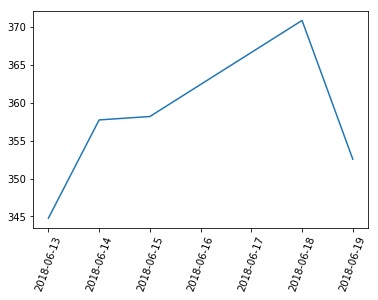

In [25]:
#stock chart
plt.plot(tsla_stock.date,tsla_stock.Close)
plt.xticks(rotation=70)


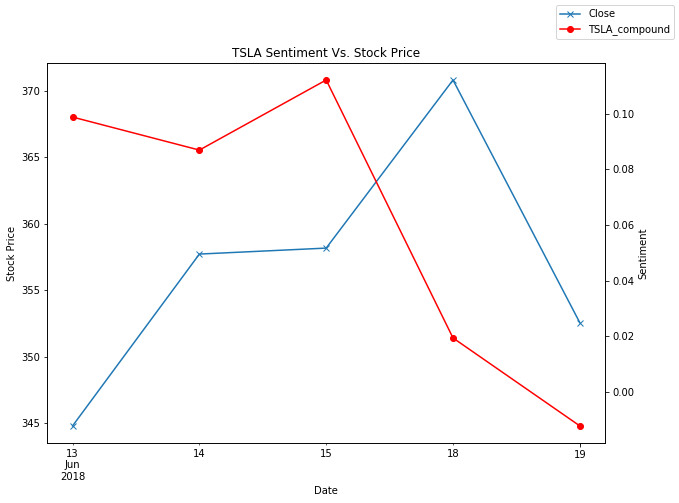

In [26]:
#Good chart
ax = tweet_stock_merged.plot(x="date", y="Close", legend=False, marker="x")
ax2 = ax.twinx()
tweet_stock_merged.plot(x="date", y="TSLA_compound", ax=ax2, legend=False, color="r", marker="o", figsize=(10,7))
#tweet_stock_merged.plot(x="date", y="TSLA_pos", ax=ax2, legend=False, color="b", marker="o")
#tweet_stock_merged.plot(x="date", y="TSLA_neg", ax=ax2, legend=False, color="b", marker="o")
#tweet_stock_merged.plot(x="date", y="TSLA_neu", ax=ax2, legend=False, color="b", marker="o")
ax.figure.legend()
plt.title("TSLA Sentiment Vs. Stock Price")
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price")
ax2.set_ylabel("Sentiment")
plt.savefig("TSLASentimentchart.png")


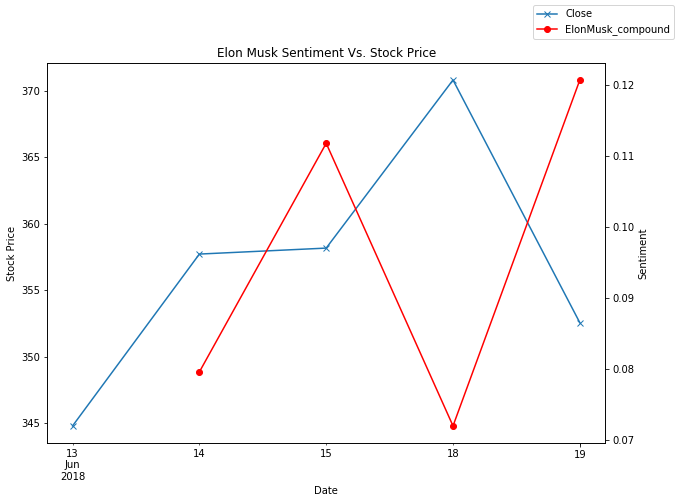

In [27]:
#Good chart
ax = tweet_stock_merged.plot(x="date", y="Close", legend=False, marker="x")
ax2 = ax.twinx()
tweet_stock_merged.plot(x="date", y="ElonMusk_compound", ax=ax2, legend=False, color="r", marker="o", figsize=(10,7))
#tweet_stock_merged.plot(x="date", y="TSLA_pos", ax=ax2, legend=False, color="b", marker="o")
#tweet_stock_merged.plot(x="date", y="TSLA_neg", ax=ax2, legend=False, color="b", marker="o")
#tweet_stock_merged.plot(x="date", y="TSLA_neu", ax=ax2, legend=False, color="b", marker="o")
ax.figure.legend()
plt.title("Elon Musk Sentiment Vs. Stock Price")
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price")
ax2.set_ylabel("Sentiment")
plt.savefig("ElonMuskSentimentchart.png")

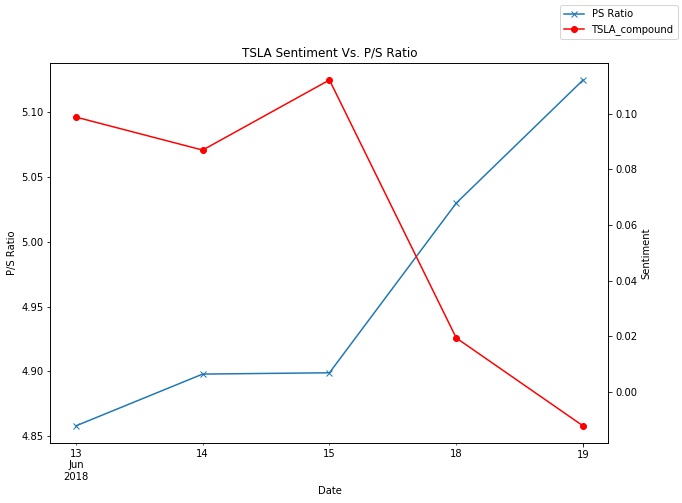

In [28]:
#Good chart
ax = tweet_stock_merged.plot(x="date", y="PS Ratio", legend=False, marker="x")
ax2 = ax.twinx()
tweet_stock_merged.plot(x="date", y="TSLA_compound", ax=ax2, legend=False, color="r", marker="o", figsize=(10,7))
#tweet_stock_merged.plot(x="date", y="TSLA_pos", ax=ax2, legend=False, color="b", marker="o")
#tweet_stock_merged.plot(x="date", y="TSLA_neg", ax=ax2, legend=False, color="b", marker="o")
#tweet_stock_merged.plot(x="date", y="TSLA_neu", ax=ax2, legend=False, color="b", marker="o")
ax.figure.legend()
plt.title("TSLA Sentiment Vs. P/S Ratio")
ax.set_xlabel("Date")
ax.set_ylabel("P/S Ratio")
ax2.set_ylabel("Sentiment")
plt.savefig("TSLA_PSRatiochart.png")

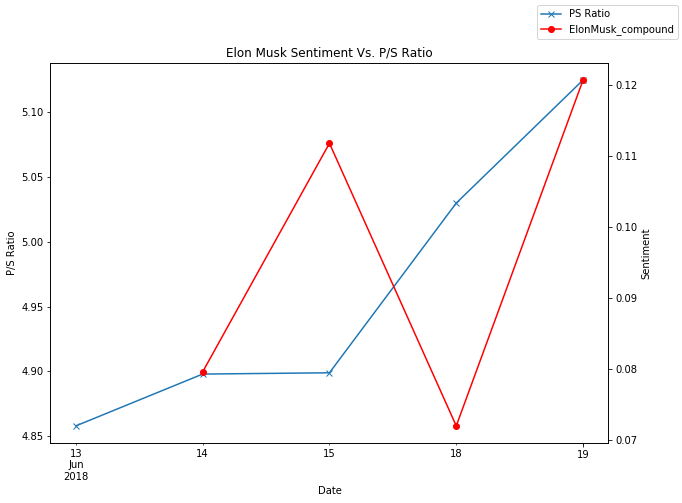

In [29]:
#Good chart
ax = tweet_stock_merged.plot(x="date", y="PS Ratio", legend=False, marker="x")
ax2 = ax.twinx()
tweet_stock_merged.plot(x="date", y="ElonMusk_compound", ax=ax2, legend=False, color="r", marker="o", figsize=(10,7))
#tweet_stock_merged.plot(x="date", y="TSLA_pos", ax=ax2, legend=False, color="b", marker="o")
#tweet_stock_merged.plot(x="date", y="TSLA_neg", ax=ax2, legend=False, color="b", marker="o")
#tweet_stock_merged.plot(x="date", y="TSLA_neu", ax=ax2, legend=False, color="b", marker="o")
ax.figure.legend()
plt.title("Elon Musk Sentiment Vs. P/S Ratio")
ax.set_xlabel("Date")
ax.set_ylabel("P/S Ratio")
ax2.set_ylabel("Sentiment")
plt.savefig("ElonMusk_PSRatio.png")

In [30]:
#export to csv
tweet_stock_merged.to_csv("tweet_stock_merged.csv", index=False)